In [56]:
import gym
from dynamic_programming_env import dynamic_programming_env
from visualization_and_metrics import visualisation_value_RM, visualize_policy_RM, average_n_episodes, v_to_q, extract_policy_RM, difference_between_policies, visualizing_epsilon_decay, plot_evolution_difference_between_policies
from value_iteration import value_iteration
from policy_iteration import policy_iteration
from q_learning import q_learning, q_to_v
from actor_critic_to_solve_RM_game import train_actor_critic

First environment:

In [44]:
micro_times = 50
capacity = 10
actions = tuple(k for k in range(50, 231, 20))
alpha = 0.4
lamb = 0.2

env = gym.make('gym_RM:RM-v0', micro_times=micro_times, capacity=capacity, actions=actions, alpha=alpha, lamb=lamb)
print(env.P)

{(0, 0): {50: [(0.2, (1, 1), 50, False), (0.8, (1, 0), 0, False)], 70: [(0.1704287577932423, (1, 1), 70, False), (0.8295712422067577, (1, 0), 0, False)], 90: [(0.14522980741473818, (1, 1), 90, False), (0.8547701925852618, (1, 0), 0, False)], 110: [(0.12375667836122817, (1, 1), 110, False), (0.8762433216387718, (1, 0), 0, False)], 130: [(0.10545848480860971, (1, 1), 130, False), (0.8945415151913902, (1, 0), 0, False)], 150: [(0.08986579282344431, (1, 1), 150, False), (0.9101342071765557, (1, 0), 0, False)], 170: [(0.07657857719502242, (1, 1), 170, False), (0.9234214228049775, (1, 0), 0, False)], 190: [(0.0652559589246079, (1, 1), 190, False), (0.9347440410753921, (1, 0), 0, False)], 210: [(0.05560746009063882, (1, 1), 210, False), (0.9443925399093612, (1, 0), 0, False)], 230: [(0.04738555173642436, (1, 1), 230, False), (0.9526144482635757, (1, 0), 0, False)]}, (0, 1): {50: [(0.2, (1, 2), 50, False), (0.8, (1, 1), 0, False)], 70: [(0.1704287577932423, (1, 2), 70, False), (0.8295712422067

Dynamic Programming using the RM environment    

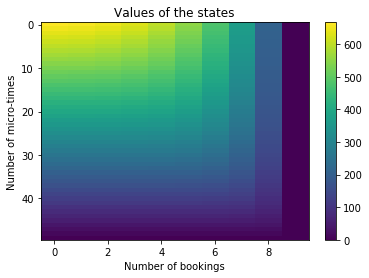

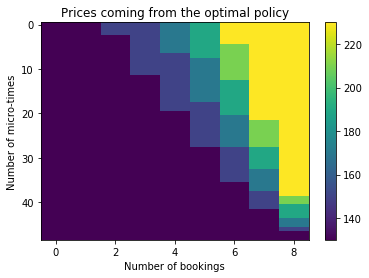

Average reward over 1000 episodes : 658.42


In [45]:
V_ref, P_ref = dynamic_programming_env(env)
V_ref = V_ref.reshape(env.T*env.C)
visualisation_value_RM(V_ref, env.T, env.C)
P_ref = P_ref.reshape(env.T * env.C)
visualize_policy_RM(P_ref, env.T, env.C)
print("Average reward over 1000 episodes : " + str(average_n_episodes(env, P_ref, 1000)))

Q-table computed from the DP values

In [46]:
gamma = 1
Q_ref = v_to_q(env, V_ref, gamma)

Value Iteration

delta = 6e+03
delta = 5.9e+03
delta = 5.7e+03
delta = 5.5e+03
delta = 5.3e+03
delta = 5.2e+03
delta = 5e+03
delta = 4.8e+03
delta = 4.7e+03
delta = 4.5e+03
delta = 4.4e+03
delta = 4.2e+03
delta = 4.1e+03
delta = 3.9e+03
delta = 3.8e+03
delta = 3.6e+03
delta = 3.5e+03
delta = 3.4e+03
delta = 3.2e+03
delta = 3.1e+03
delta = 3e+03
delta = 2.8e+03
delta = 2.7e+03
delta = 2.6e+03
delta = 2.5e+03
delta = 2.3e+03
delta = 2.2e+03
delta = 2.1e+03
delta = 2e+03
delta = 1.9e+03
delta = 1.8e+03
delta = 1.6e+03
delta = 1.5e+03
delta = 1.4e+03
delta = 1.3e+03
delta = 1.2e+03
delta = 1.1e+03
delta = 1e+03
delta = 9.4e+02
delta = 8.4e+02
delta = 7.5e+02
delta = 6.6e+02
delta = 5.7e+02
delta = 4.8e+02
delta = 4e+02
delta = 3.1e+02
delta = 2.3e+02
delta = 1.5e+02
delta = 7.6e+01
Converged at 49
Average reward over 1000 episodes : 675.32


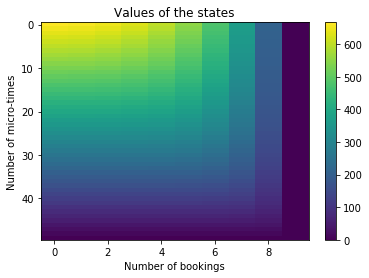

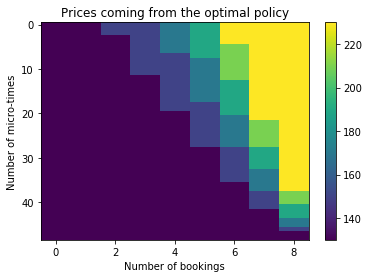

In [47]:
max_iter = 100000
epsilon = 1e-20
gamma = 0.99

v = value_iteration(env, max_iter, epsilon)
visualisation_value_RM(v, env.T, env.C)
policy = extract_policy_RM(env, v, gamma)
visualize_policy_RM(policy, env.T, env.C)
print("Average reward over 1000 episodes : " + str(average_n_episodes(env, policy, 1000)))

Policy Iteration

Converged at 3
Average reward over 1000 episodes : 681.6
Difference with the optimal policy coming from DP : 4170.0


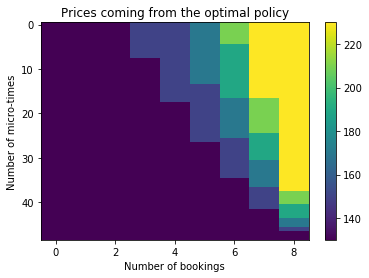

In [48]:
max_iter = 100000
epsilon = 1e-20
gamma = 0.99

policy = policy_iteration(env, gamma, max_iter, epsilon)
visualize_policy_RM(policy, env.T, env.C)
print("Average reward over 1000 episodes : " + str(average_n_episodes(env, policy, 1000)))
print("Difference with the optimal policy coming from DP : "+str(difference_between_policies(policy, P_ref)))


Q-Learning

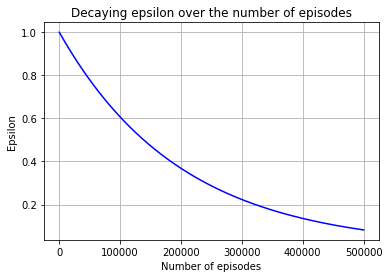

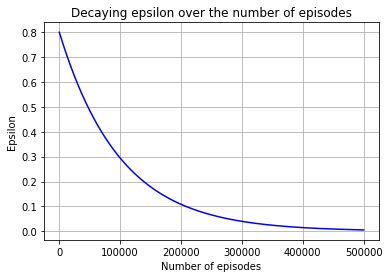

Average reward over 1000 episodes after 0 episodes : 665.32
Difference with the optimal policy after 0 episodes : 14870.0
Average reward over 1000 episodes after 50000 episodes : 599.29
Difference with the optimal policy after 50000 episodes : 24010.0
Average reward over 1000 episodes after 100000 episodes : 624.64
Difference with the optimal policy after 100000 episodes : 16950.0
Average reward over 1000 episodes after 150000 episodes : 660.7
Difference with the optimal policy after 150000 episodes : 12150.0
Average reward over 1000 episodes after 200000 episodes : 653.52
Difference with the optimal policy after 200000 episodes : 9370.0
Average reward over 1000 episodes after 250000 episodes : 670.62
Difference with the optimal policy after 250000 episodes : 7810.0
Average reward over 1000 episodes after 300000 episodes : 663.96
Difference with the optimal policy after 300000 episodes : 6510.0
Average reward over 1000 episodes after 350000 episodes : 676.18
Difference with the optimal

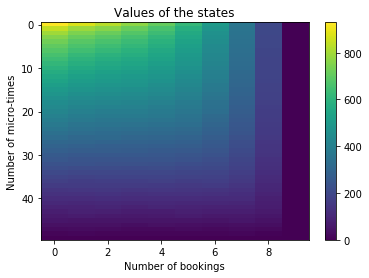

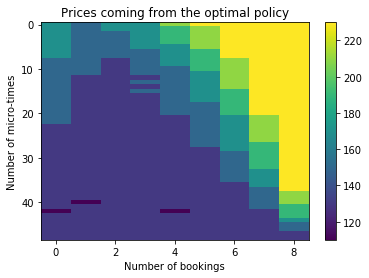

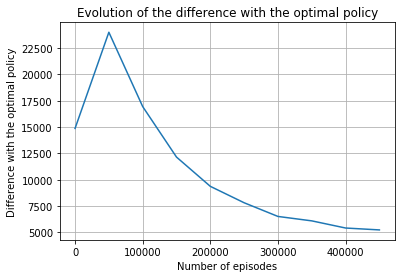

In [49]:
alpha, alpha_min, alpha_decay, gamma = 0.8, 0, 0.99999, 1
nb_episodes = 500000
epsilon, epsilon_min, epsilon_decay = 1, 0.01, 0.999995
temp = 100

visualizing_epsilon_decay(nb_episodes, epsilon, epsilon_min, epsilon_decay)
visualizing_epsilon_decay(nb_episodes, alpha, alpha_min, alpha_decay)
q_table, nb_episodes_list, diff_with_policy_opt_list, M = q_learning(env, alpha, alpha_min, alpha_decay, gamma,
                                                                         nb_episodes, epsilon,
                                                                         epsilon_min, epsilon_decay, P_ref, temp)
v = q_to_v(env, q_table)
visualisation_value_RM(v, env.T, env.C)
policy = extract_policy_RM(env, v, gamma)
visualize_policy_RM(policy, env.T, env.C)
print("Average reward over 1000 episodes : " + str(average_n_episodes(env, policy, 1000)))
plot_evolution_difference_between_policies(nb_episodes_list, diff_with_policy_opt_list)


Second environment:

In [50]:
micro_times = 50
capacity = 10
actions = tuple(k for k in range(50, 81, 10))
alpha = 0.7
lamb = 0.8

env = gym.make('gym_RM:RM-v0', micro_times=micro_times, capacity=capacity, actions=actions, alpha=alpha, lamb=lamb)
print(env.P)

{(0, 0): {50: [(0.8, (1, 1), 50, False), (0.19999999999999996, (1, 0), 0, False)], 60: [(0.6954865883190448, (1, 1), 60, False), (0.30451341168095525, (1, 0), 0, False)], 70: [(0.6046269931645805, (1, 1), 70, False), (0.39537300683541954, (1, 0), 0, False)], 80: [(0.5256374558520455, (1, 1), 80, False), (0.47436254414795453, (1, 0), 0, False)]}, (0, 1): {50: [(0.8, (1, 2), 50, False), (0.19999999999999996, (1, 1), 0, False)], 60: [(0.6954865883190448, (1, 2), 60, False), (0.30451341168095525, (1, 1), 0, False)], 70: [(0.6046269931645805, (1, 2), 70, False), (0.39537300683541954, (1, 1), 0, False)], 80: [(0.5256374558520455, (1, 2), 80, False), (0.47436254414795453, (1, 1), 0, False)]}, (0, 2): {50: [(0.8, (1, 3), 50, False), (0.19999999999999996, (1, 2), 0, False)], 60: [(0.6954865883190448, (1, 3), 60, False), (0.30451341168095525, (1, 2), 0, False)], 70: [(0.6046269931645805, (1, 3), 70, False), (0.39537300683541954, (1, 2), 0, False)], 80: [(0.5256374558520455, (1, 3), 80, False), (

Dynamic Programming using the RM environment    

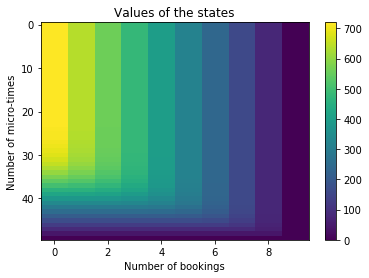

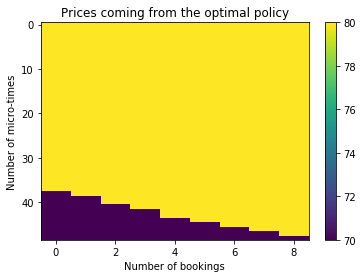

Average reward over 1000 episodes : 720.0


In [52]:
V_ref, P_ref = dynamic_programming_env(env)
V_ref = V_ref.reshape(env.T*env.C)
visualisation_value_RM(V_ref, env.T, env.C)
P_ref = P_ref.reshape(env.T * env.C)
visualize_policy_RM(P_ref, env.T, env.C)
print("Average reward over 1000 episodes : " + str(average_n_episodes(env, P_ref, 1000)))

Q-Learning

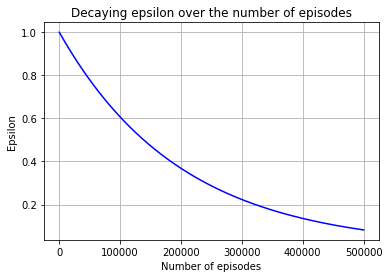

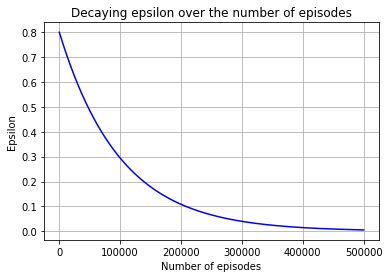

Average reward over 1000 episodes after 0 episodes : 630.0
Difference with the optimal policy after 0 episodes : 41050.0
Average reward over 1000 episodes after 50000 episodes : 720.0
Difference with the optimal policy after 50000 episodes : 37030.0
Average reward over 1000 episodes after 100000 episodes : 720.0
Difference with the optimal policy after 100000 episodes : 37060.0
Average reward over 1000 episodes after 150000 episodes : 720.0
Difference with the optimal policy after 150000 episodes : 37040.0
Average reward over 1000 episodes after 200000 episodes : 720.0
Difference with the optimal policy after 200000 episodes : 37030.0
Average reward over 1000 episodes after 250000 episodes : 720.0
Difference with the optimal policy after 250000 episodes : 37070.0
Average reward over 1000 episodes after 300000 episodes : 720.0
Difference with the optimal policy after 300000 episodes : 37040.0
Average reward over 1000 episodes after 350000 episodes : 720.0
Difference with the optimal pol

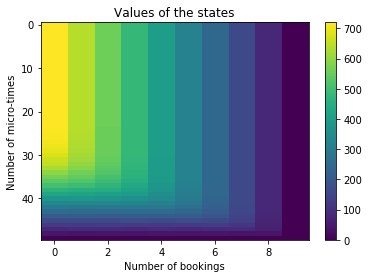

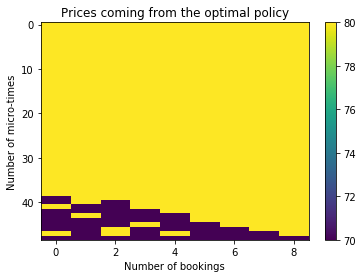

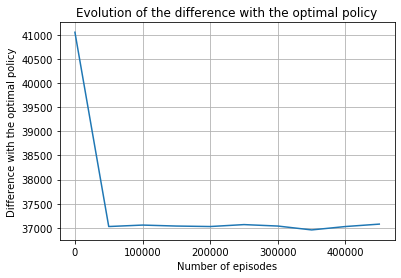

In [51]:
alpha, alpha_min, alpha_decay, gamma = 0.8, 0, 0.99999, 1
nb_episodes = 500000
epsilon, epsilon_min, epsilon_decay = 1, 0.01, 0.999995
temp = 100

visualizing_epsilon_decay(nb_episodes, epsilon, epsilon_min, epsilon_decay)
visualizing_epsilon_decay(nb_episodes, alpha, alpha_min, alpha_decay)
q_table, nb_episodes_list, diff_with_policy_opt_list, M = q_learning(env, alpha, alpha_min, alpha_decay, gamma,
                                                                         nb_episodes, epsilon,
                                                                         epsilon_min, epsilon_decay, P_ref, temp)
v = q_to_v(env, q_table)
visualisation_value_RM(v, env.T, env.C)
policy = extract_policy_RM(env, v, gamma)
visualize_policy_RM(policy, env.T, env.C)
print("Average reward over 1000 episodes : " + str(average_n_episodes(env, policy, 1000)))
plot_evolution_difference_between_policies(nb_episodes_list, diff_with_policy_opt_list)


Actor-Critic

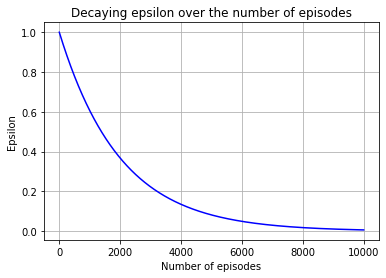

  0%|          | 0/10000 [00:00<?, ?it/s]


ValueError: Error when checking input: expected input_12 to have shape (4,) but got array with shape (1,)

In [57]:
alpha, alpha_min, alpha_decay, gamma = 0.8, 0, 0.99999, 1
nb_episodes = 10000
epsilon, epsilon_decay = 1, 0.9995
lr = 0.001
tau = 0.125
visualizing_epsilon_decay(nb_episodes, epsilon, 0, epsilon_decay)
policy = train_actor_critic(env, nb_episodes, epsilon, epsilon_decay, gamma, tau, lr)
visualize_policy_RM(policy, env.T, env.C)